## Combined Cycle Power Plant

A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another.The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load.

We need to predict the net hourly electrical energy output(PE) of the power plant using the features of Temperature(AT), Ambient Pressure(AP), Relative Humidity(RH) and Exhaust Vacuum(V).

Combined Cycle Power Plant [dataset](https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant)

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d

### Data Preprocessing

In [101]:
df=pd.read_excel("C:/Users/Venu/Desktop/HDS/Capstone Project/Combine_Cycle_Power_Plant.xlsx")

In [102]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


### Data Visualization and Feature Selection

When we plot the graph for all features(Temperature [AT], Pressure [AP], Humidity [RH], Vaccum [V])  with respect to the target(Electric Energy [PE]) the datapoints are linearly distributed that is all data points are either increasing or decreasing with respect to the target.

Since all the features are linearly distributed so all the features are required to implement the model.

In [103]:
feature=pd.concat([df.AT,df.V,df.AP,df.RH],axis=1)

In [104]:
target=pd.concat([df.PE],axis=1)

In [105]:
x1=df["AT"]
x2=df["V"]
x3=df["AP"]
x4=df["RH"]
y=df["PE"]

### Feature Scaling

When we plot the graph for each feature with respect to target the values are in different margin. To come under the same scale we need to normalize it. Here normalization can be done by calculating the difference of minimum and maximum value 

In [106]:
x1=(x1-x1.min())/(x1.max()-x1.min())
x2=(x2-x2.min())/(x2.max()-x2.min())
x3=(x3-x3.min())/(x3.max()-x3.min())
x4=(x4-x4.min())/(x4.max()-x4.min())
y=(y-y.min())/(y.max()-y.min())

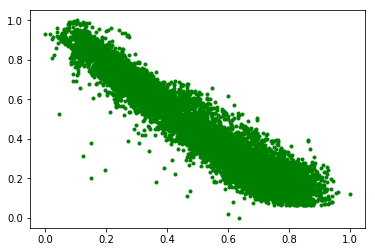

In [107]:
plt.plot(x1,y,'g.')


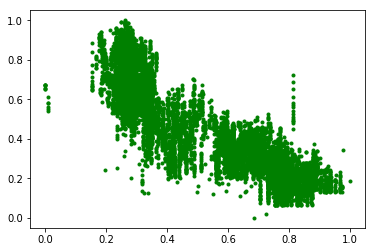

In [108]:
plt.plot(x2,y,'g.')

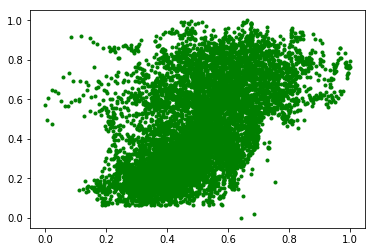

In [109]:
plt.plot(x3,y,'g.')

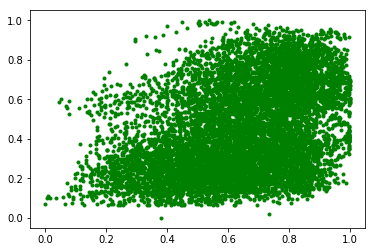

In [110]:
plt.plot(x4,y,'g.')

Plotting the graph for all features with respect to target

In [111]:
corelation=df.corr('pearson')

In [112]:
corelation


,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


In [113]:
corelation["PE"].sort_values()

AT   -0.948128
V    -0.869780
RH    0.389794
AP    0.518429
PE    1.000000
Name: PE, dtype: float64

Performing the pearson's correlation for choosing the best feature which is highly related to the target values[PE]

In [114]:
X1=np.array(x1)
X2=np.array(x2)
X3=np.array(x3)
Y=np.array(y)

### Splitting the dataset 

We are splitting the dataset for training and testing the datapoints in the ratio 3:2.So that we can train our model and test the datapoints on the same model.

In [115]:
X1_train,X1_test,X2_train,X2_test,X3_train,X3_test,Y_train,Y_test=train_test_split(X1,X2,X3,Y,test_size=0.2)

## Linear Regression
### Hypothesis Equation

As above mentioned we need to predict the electric energy output so that by analysing the data visualization we can choose straight line equation to fit the model covering all the points with less error.

Here we are using three features(x1,x2,x3) of the dataset.a,b,c,d represents the weights.

In [116]:
def hypothesis(a,b,c,d,x1,x2,x3):
    return a*x1+b*x2+c*x3+d

### Error Equation

When we plot the hypothesis equation to represent the model, all data points are not covered.There is some error with actual datapoint and the hypothesis equation representation.So we need to calculate the error for all the datapoints in the model with respect to the hypothesis equation values.

Error is find out by taking difference between the hypothesis equation and actual data point(y).We are finding the mean(m) of all the errors for the particular hypothesis equation.

Suppose if there is any negative error value the sum may be zero so that, we are finding the square of the difference between the hypothesis equation datapoint and actual data point.It leads to all positive error values.Since we are squaring the difference we need to reduce by 2.  

This function we called it as mean square error equation.

In [117]:
def error(a,b,c,d,x1,x2,x3,y):
    e = 0
    m = len(x1)
    for i in range(m):
        e += np.power((hypothesis(a,b,c,d,x1[i],x2[i],x3[i])-y[i]), 2)
    
    return (1/(2*m))*e    

### Step Gradient Equation

When we plot the error equation with respect to the weights we will get the curve something like parabola. Our aim to minimize the error such that it should reach the global minima of the parabola curve.We dont know where is our data point in the parabola curve so that to reach the global minima we need to differenciate the error equation with respect to the weight to get the slope of that particular data point.

Gradient descent equation represented by grad_a,grad_b,grad_c,grad_d

If the slope of the data point is negative then we need to move towards right to reach the global minima so that we should add small value to weights. Simillarly if the slope of the data point is positive then we need to move towards left to reach the global minima so that we should subtract small value to weights.

We need to update the particular weight after adding or subtracting the small values represented by a,b,c,d

Learning rate defines the step size to read the global minima.Suppose if the step size is large then it may cross the global minima leads to the overfit the model.To avoid these kind of issues we are defining the learning rate.It tells the how much steps should be moved.

In [118]:
def step_gradient(a,b,c,d,x1,x2,x3,y,learning_rate):
    grad_a = 0
    grad_b = 0
    grad_c = 0
    grad_d = 0
    m = len(x1)
    for i in range(m):
        grad_a += 2/m * (hypothesis(a,b,c,d,x1[i],x2[i],x3[i]) - y[i]) * x1[i]
        grad_b += 2/m * (hypothesis(a,b,c,d,x1[i],x2[i],x3[i]) - y[i]) * x2[i]
        grad_c += 2/m * (hypothesis(a,b,c,d,x1[i],x2[i],x3[i]) - y[i]) * x3[i]
        grad_d += 2/m * (hypothesis(a,b,c,d,x1[i],x2[i],x3[i]) - y[i])
    a = a - (grad_a * learning_rate)
    b = b - (grad_b * learning_rate)
    c = c - (grad_c * learning_rate)
    d = d - (grad_d * learning_rate)
    return a, b, c, d

### Descend Function

We are intialising the values of a,b,c,d. Iterations tells about how many times we are training the model.In this function we are printing the values of error at every 1000 iteration. 

In [119]:
def descend(initial_a, initial_b, initial_c, intial_d, x1, x2, x3, y, learning_rate, iterations):
    a = initial_a
    b = initial_b
    c = initial_c
    d = intial_d
    for i in range(iterations):
        e = error(a, b, c, d, x1, x2, x3, y)
        if i % 1000 == 0:
            print(f"Error: {e}, a: {a}, b: {b}, c: {c}, d:{d}")
        
        a, b, c,d = step_gradient(a, b, c, d, x1, x2, x3, y, learning_rate)

    return a, b, c, d

We need to change the weights to generalized the model

In [120]:
a =-0.7695438477187093
b = -0.24495825459051548
c =0.08267434890646153
d =0.9252067876244409
learning_rate = 0.05
iterations = 10000

In [121]:
final_a,final_b,final_c,final_d=descend(a,b,c,d,X1_train,X2_train,X3_train,Y_train,learning_rate,iterations)

Error: 0.0020927619282768346, a: -0.7695438477187093, b: -0.24495825459051548, c: 0.08267434890646153, d:0.9252067876244409
Error: 0.0020916404673908596, a: -0.7625415691311942, b: -0.24649633173519958, c: 0.08677887037145987, d:0.9205193551743415
Error: 0.0020914245783088614, a: -0.7594843982469551, b: -0.24834249531307367, c: 0.08901531420806653, d:0.9187843159285118
Error: 0.0020913688523615, a: -0.757865328813661, b: -0.24940519977383616, c: 0.0900201331016633, d:0.9180012308077492
Error: 0.0020913541047194216, a: -0.7570147420353689, b: -0.24999012503312387, c: 0.09049131012133571, d:0.9176325981480589
Error: 0.0020913501626199068, a: -0.7565700891227217, b: -0.25030435682923086, c: 0.09071961323364895, d:0.9174534726700633
Error: 0.002091349104759423, a: -0.7563383433003685, b: -0.25047082805825643, c: 0.09083285340198519, d:0.9173644497436831
Error: 0.002091348820453787, a: -0.7562177848991768, b: -0.25055829333324187, c: 0.09088992309653521, d:0.9173195258728101
Error: 0.002091

In [122]:
(error(final_a,final_b,final_c,final_d,X1_train,X2_train,X3_train,Y_train))


0.0020913487179052524

In [123]:
(error(final_a,final_b,final_c,final_d,X1_test,X2_test,X3_test,Y_test))

0.0021151243097953763

### Bestfit the model

By implementing the combined cycle power plant dataset using sklearn library for linear regression we will get the root mean square error value which best fits the model. Comparing these error values with sklearn which best fit our model.

#### Root mean squared error for trained data

In [124]:
np.sqrt(error(final_a,final_b,final_c,final_d,X1_train,X2_train,X3_train,Y_train))

0.04573126630550758

#### Root mean squared error for test data

In [125]:
np.sqrt(error(final_a,final_b,final_c,final_d,X1_test,X2_test,X3_test,Y_test))

0.045990480643230684

## Linear Regression using Sklearn

In [137]:
fe=pd.concat([df.AT,df.V,df.AP],axis=1)

In [138]:
X=np.array(fe)
Y=np.array(y)

In [139]:
X_train,X_test,Y_train,Y_test=train_test_split(fe,Y,test_size=0.2)

In [140]:
from sklearn.linear_model import LinearRegression

In [141]:
regressor = LinearRegression()

In [142]:
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Fitting the Linear model

In [143]:
Y_pred=regressor.predict(X_test)

Predict using the Linear Model

In [144]:
for i in zip(Y_pred,Y_test):
    print(i)

(0.6396177734333601, 0.6296688741721858)
(0.1549892945863367, 0.25218543046357644)
(0.5484092789727586, 0.6161589403973508)
(0.2204665431587094, 0.17112582781456975)
(0.2548857780377398, 0.24596026490066217)
(0.09449587642969282, 0.12079470198675503)
(0.5590664353933967, 0.4925827814569536)
(0.6202881090151353, 0.6251655629139071)
(0.40696606567366356, 0.3286092715231788)
(0.14239438904639168, 0.11589403973509933)
(0.13281228089115338, 0.1320529801324507)
(0.4168930262950836, 0.32238410596026534)
(0.30607607165079753, 0.32635761589403955)
(0.6085152083927305, 0.6086092715231787)
(0.7923718846441798, 0.6218543046357614)
(0.20069643084471678, 0.2125827814569538)
(0.7328890483342125, 0.8042384105960269)
(0.7267397219531331, 0.7872847682119205)
(0.2230877842298178, 0.1782781456953647)
(0.7820189769362558, 0.7797350993377484)
(0.5674039318363824, 0.5274172185430462)
(0.7763512430871393, 0.8470198675496687)
(0.41555960715912565, 0.31456953642384106)
(0.5958420022878816, 0.6369536423841063)
(

(0.6426579662764438, 0.6606622516556291)
(0.3852523441079456, 0.33178807947019884)
(0.7303883156540982, 0.7590728476821192)
(0.6899628377478015, 0.7850331125827812)
(0.7570651670697051, 0.6552317880794706)
(0.3477273379618613, 0.3088741721854304)
(0.6877128444750675, 0.777880794701987)
(0.4276975399911025, 0.4296688741721854)
(0.14703286564800377, 0.14529801324503347)
(0.24315124700290935, 0.20715231788079452)
(0.11198425304293202, 0.17496688741721902)
(0.49294717520765396, 0.5211920529801327)
(0.37279726271709235, 0.39218543046357635)
(0.7304436040954794, 0.7603973509933778)
(0.18742059280050594, 0.1425165562913906)
(0.10819638624306105, 0.12900662251655642)
(0.5407364432772535, 0.47708609271523156)
(0.5291809438560999, 0.547814569536424)
(0.8208102466253395, 0.787814569536424)
(0.27523402764019034, 0.325695364238411)
(0.282730429826894, 0.25430463576158924)
(0.8001818793667819, 0.7921854304635761)
(0.6826221103722039, 0.7686092715231791)
(0.7890875370849855, 0.8807947019867549)
(0.41

In [145]:
from sklearn.metrics import mean_squared_error, r2_score

#### Root mean squared error 

In [146]:
np.sqrt(mean_squared_error(Y_test,Y_pred))

0.06642849921429685

In [147]:
r2_score(Y_test,Y_pred)

0.9166449841328892

Computing the r2_score for Linear Regression